# Image enhancement
Goal: Read an image and try to enhance it.

In [2]:
# Uncomment this if scikit-image is not available
#!pip install scikit-image

# Clone the repository. Uncomment this line if it you want to get a local copy of the repository.
# !git clone https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

# Pull updates from the git repository. Uncomment this line if you already have cloned the repository and you want to update it. In this case, this file should belong to the repository.
# !git pull https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

From https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [4]:
# Load libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage import color as col

import json

In [5]:
# read an image
f = imageio.imread('images/dark_r.png')

In [6]:
# Check variables in the workspace
%whos

Variable       Type        Data/Info
------------------------------------
col            module      <module 'skimage.color' f<...>image/color/__init__.py'>
data           module      <module 'skimage.data' fr<...>kimage/data/__init__.py'>
exposure       module      <module 'skimage.exposure<...>ge/exposure/__init__.py'>
f              Array       [[[ 0  1  1]\n  [12 10  9<...> 0  1  1]\n  [ 8  7  6]]]
imageio        module      <module 'imageio' from '/<...>ges/imageio/__init__.py'>
img_as_float   function    <function img_as_float at 0x7f68a92bb550>
json           module      <module 'json' from '/usr<...>hon3.8/json/__init__.py'>
np             module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt            module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


## Get some information on the image
- Check the type, size, number of channels...
- Show the image

((280, 810, 3), 0, 13, dtype('uint8'))
4.996872427983539
(280, 810)
[[ 4  4  1  8  6 11  5 12 13  1]
 [ 4  5  8  1 10 10  0  4  7  7]
 [ 4  7 11  1  6  7  4 10 10  8]
 [11  3  7  4  8  4  0  2  8  2]
 [ 8  7  1  1  8  4  1  0  9  7]]


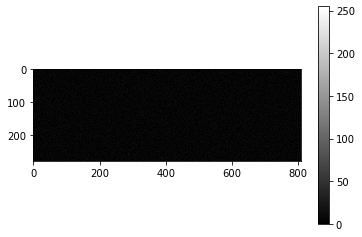

In [13]:
# add your code
print((f.shape, f.min(), f.max(), f.dtype))
print(f.mean())

plt.imshow(f[:,:,0], cmap=plt.gray())
plt.clim([0,255]) # set limits to the 
plt.colorbar()

print(f[:,:,0].shape)

print(f[100:110:2,30:20:-1,0])

## Histogram
Let us check the distributions of pixels values in the image.

`numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)`

Compute the histogram of a set of data.
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

(226800,)


Text(0, 0.5, '# of occurence')

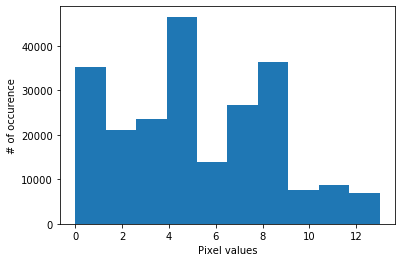

In [14]:
plt.figure()
# plt.hist(f) # Error
# plt.hist(f[:,:,0]) # -> Don't do that! It gives an histogram on rows/cols of the image, not the whole image (see the grouped bars).

# Flatten the image: a matrix is converted in a vector
f1 = f[:,:,0].flatten()
print(f1.shape)

plt.hist(f1)
# plt.hist(f[:,:,0].flatten())
plt.xlabel('Pixel values')
plt.ylabel('# of occurence')


[0.03575187 0.12090898 0.09409508 0.10446721 0.10137688 0.10527087
 0.06155786 0.11812947 0.11431096 0.04737167 0.03404686 0.06271229]
(12,)
1.0


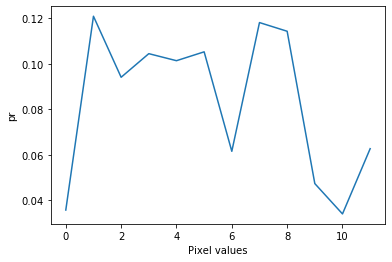

In [15]:
# Using numpy
hist, bins = np.histogram(f[:,:,0].flatten(), bins=np.arange(f[:,:,0].min(),f[:,:,0].max()), density=True)
print(hist)
print(hist.shape)
print(sum(hist))
plt.xlabel('Pixel values')
plt.ylabel('pr')
plt.plot(hist)


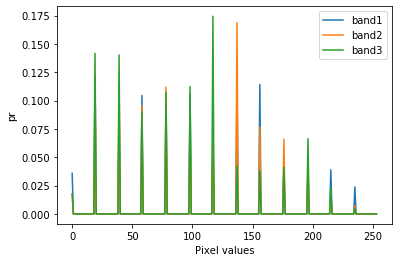

(280, 810, 3)


In [18]:
# Stretch the histogram for the three bands
g = f.copy()

for i in range(0,f.shape[2]):

    g[:,:,i] = g[:,:,i].astype(float)/g[:,:,i].max() * 255
    g[:,:,i] = g[:,:,i].astype(int)

    hist, bins = np.histogram(g[:,:,i].flatten(), bins=np.arange(g[:,:,i].min(),g[:,:,i].max()), density=True)
    #print(hist)
    #print(hist.shape)
    #print(sum(hist))
    plt.xlabel('Pixel values')
    plt.ylabel('pr')
    plt.plot(hist, label="band"+str(i+1))
    
plt.legend()
plt.show()
print(g.shape)

Text(0.5, 1.0, 'Stretched')

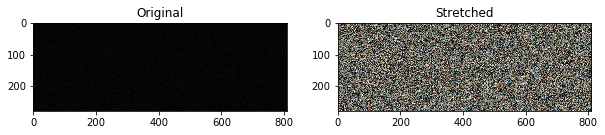

In [21]:
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(f)
plt.title('Original')
plt.subplot(122)
plt.imshow(g)
plt.title('Stretched')

[ 86176 172626 176390  87576 112646 137175  58148  19115  37186  41979]
(226800, 3)


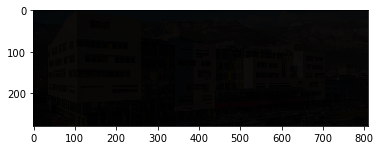

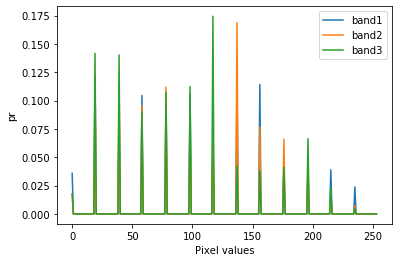

(280, 810, 3)
int64


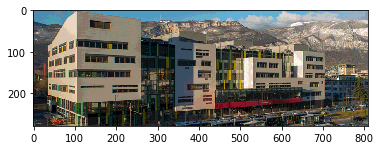

In [24]:
with open("images/idx.txt", "r") as fp:
    idx = np.array(json.load(fp))
    
print(idx[0:10])

# back permutation
f1 = f.copy()
f2 = np.reshape(f1, (f1.shape[0] * f1.shape[1], f1.shape[2]))
print(f2.shape)
f3 = np.zeros(f2.shape)
f3[idx,:] = f2
f2 = np.reshape(f3, f.shape)
f2 = f2.astype(np.uint8)


plt.figure()
plt.imshow(f2)




plt.figure()
# Stretch the histogram for the three bands
g = f2.copy()

for i in range(0,f.shape[2]):

    g[:,:,i] = g[:,:,i].astype(float)/g[:,:,i].max() * 255
    g[:,:,i] = g[:,:,i].astype(int)

    hist, bins = np.histogram(g[:,:,i].flatten(), bins=np.arange(g[:,:,i].min(),g[:,:,i].max()), density=True)

    plt.xlabel('Pixel values')
    plt.ylabel('pr')
    plt.plot(hist, label="band"+str(i+1))
    
plt.legend()
plt.show()
print(g.shape)

g = g.astype(int)

plt.figure()
plt.imshow(g)

print(g.dtype)



uint8
uint8


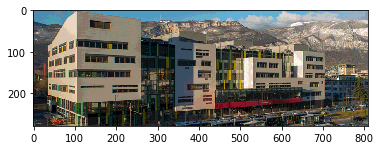

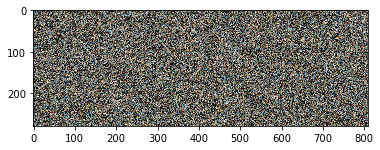

In [25]:

plt.figure()
plt.imshow(exposure.rescale_intensity(f2))
print(f2.dtype)

plt.figure()
plt.imshow(exposure.rescale_intensity(f))
print(f.dtype)

## Compute hist on another image

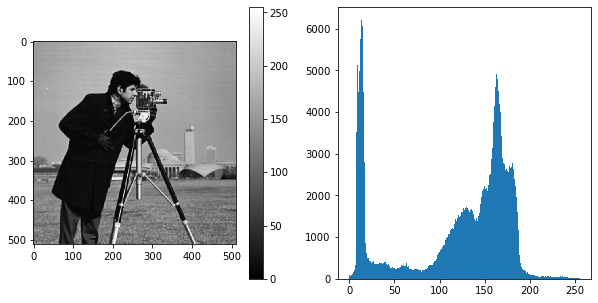

In [38]:
from skimage import data
img = data.camera()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(122)
_ = plt.hist(img.flatten(), bins=256)



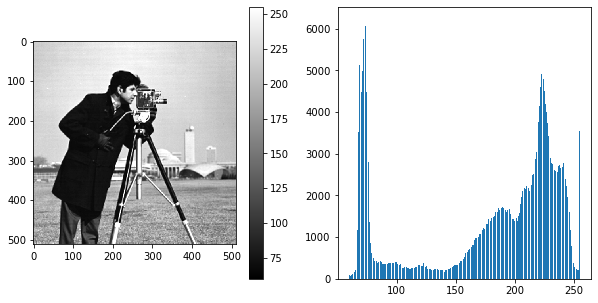

In [43]:
plt.figure(figsize=[10,5])
plt.subplot(121)
img1 = img.astype(float)+60

# clip data range for avoiding overflow
img1 = np.clip(img1, 0, 255) 
img1 = img1.astype(np.uint8)

plt.imshow(img1, cmap=plt.cm.gray)
plt.colorbar()


plt.subplot(122)
_ = plt.hist(img1.ravel(), bins=256)
#plt.hist(img.ravel(), bins='auto')